IMPORT LIBRARY

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

INSTALL & IMPORT LIBRARY SASTRAWI UNTUK STOPWORDS BAHASA INDONESIA

In [4]:
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

     |████████████████████████████████| 215kB 8.4MB/s 


DOWNLOAD FILE BERISI KUMPULAN KOMENTAR TERHADAP PILKADA DKI 2017

In [5]:
# Load in the dataframe
df = pd.read_csv("https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_pilkada_DKI_2017.csv", index_col=0)

HEAD

In [6]:
# Looking at first 5 rows of the dataset
df.head()

,Sentiment,Pasangan Calon,Text Tweet
Id,,,
1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


MERUBAH NAMA ATRIBUT TEXT TWEET MENJADI COMMENT

In [7]:
df = df.rename(columns={'Text Tweet': 'comment'})
df.head()

,Sentiment,Pasangan Calon,comment
Id,,,
1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


JUMLAH KATA

In [8]:
text = " ".join(review for review in df.comment)
print ("There are {} words in the combination of all review.".format(len(df)))

There are 900 words in the combination of all review.


BUAT VARIABEL STOPWORDS BAHASA INDONESIA

In [9]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

PLOT GAMBAR

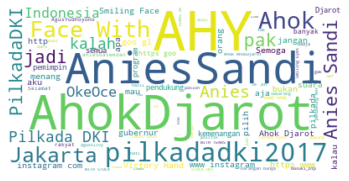

In [10]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()